# Psso a Passo do Algoritmo

- **Inicialização:** Gerar população aleatória de betores (cada vetor = solução candidata).
- **Avaliação:** Calcular o fitness (valor da função).
- **Seleção:** Escolher indivíduos com melhores fitness.
- **Cruzamento (Crossover):** Combinar partes de indivíduos.
- **Mutação:** Alterar levemente alguns genes.
- **Repetição:** Iterar até o número máximo de gerações ou convergência.
- **Resultado final:** Mostrar o melhor indivíduo encontrado.

## Biblioteca

In [1]:
import random
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
from deap import base, creator, algorithms, tools

# Utils
from utils.functions import rastrigin
from utils import config

## Configurando o DEAP

In [2]:
# Seed aleatório (para reprodutibilidade)
random.seed(config.SEED)
np.random.seed(config.SEED)

# Gera o toolbox responsável por registrar as configurações do framework
toolbox = base.Toolbox()

In [ ]:
# Cria o tipo de função indivíduo
creator.create("Minimization", base.Fitness, weights=(-1.0,))
creator.create("Genes", list, fitness=creator.Minimization)

# Registra os nomes e os tipos de individuos, fitness e população
toolbox.register("Attribute", random.uniform, config.BOUND_LOW, config.BOUND_UP)
toolbox.register("Chromossome", tools.initRepeat, creator.Genes, toolbox.Attribute, n=config.IND_SIZE)
toolbox.register("Population", tools.initRepeat, list, toolbox.Chromossome)

# Registra os operadores
toolbox.register("evaluate", rastrigin)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.5, indpb=0.1) #mu=média da variação, sigma=Intensidade das mutações(0.1 a 1.0) e indpb=Probabilidade de cada gene mutar(0.1 a 0.3)
toolbox.register("select", tools.selBest)
#toolbox.register("select", tools.selTournament, tournsize=5)

# Gera o formato de análise estátistica
st = tools.Statistics(key=lambda ind: ind.fitness.values)
st.register("Min", np.min)
st.register("Avg", np.mean)

In [4]:
# Escolha da estratégia
USE_PLUS_STRATEGY = True #True → (μ + λ), False → (μ, λ)

best_overall = None
best_fitness = float('inf') # Pois é minimização
best_run = None
list_fitness_runs = []

if USE_PLUS_STRATEGY:
    algorithm_name = 'Estratégia (μ + λ)'
    print('Estratégia (μ + λ)')
else:
    algorithm_name = 'Estratégia (μ, λ)'
    print(algorithm_name)

for i in range(config.TRIALS):
    pop = toolbox.Population(n=config.MU)
    if USE_PLUS_STRATEGY:
        finalPop, log = algorithms.eaMuPlusLambda(pop, toolbox, config.MU, config._LAMBDA, config.PROB_CX, config.PROB_MT, config.N_GER,
                                                stats=st, verbose=False)
    else:
        finalPop, log = algorithms.eaMuCommaLambda(pop, toolbox, config.MU, config._LAMBDA, config.PROB_CX, config.PROB_MT, config.N_GER,
                                                stats=st, verbose=False)

    bestSolution = tools.selBest(finalPop, 1)
    current_best = bestSolution[0]
    current_fitness = current_best.fitness.values[0]
    print(f'Run: {i} - Fitness: {current_fitness}')
    list_fitness_runs.append(current_fitness)

    if current_fitness < best_fitness:
        best_fitness = current_fitness
        best_overall = current_best
        best_run = i

Estratégia (μ + λ)
Run: 0 - Fitness: 0.02789670607961625
Run: 1 - Fitness: 0.07942512793850653
Run: 2 - Fitness: 1.481545002197663
Run: 3 - Fitness: 0.0828838029282366
Run: 4 - Fitness: 0.4038505662165477
Run: 5 - Fitness: 0.04537987947463762
Run: 6 - Fitness: 0.04427169116240748
Run: 7 - Fitness: 0.07580254630944694
Run: 8 - Fitness: 0.11493858290695869
Run: 9 - Fitness: 0.06594419681414365
Run: 10 - Fitness: 0.030644582429118827
Run: 11 - Fitness: 0.013450937500664395
Run: 12 - Fitness: 0.048512622384535575
Run: 13 - Fitness: 0.053750857574769384
Run: 14 - Fitness: 0.12778410554473396
Run: 15 - Fitness: 0.035580078544981575
Run: 16 - Fitness: 0.09113965707653904
Run: 17 - Fitness: 1.0679145402684895
Run: 18 - Fitness: 0.0807564667690599
Run: 19 - Fitness: 0.03550815560265619
Run: 20 - Fitness: 1.0646478767764904
Run: 21 - Fitness: 0.35689784524424795
Run: 22 - Fitness: 0.12341472086001204
Run: 23 - Fitness: 0.02311494512676404
Run: 24 - Fitness: 0.02444825631528147
Run: 25 - Fitness:

In [12]:
# Imprime a melhor solução da população final
print(f"===== MELHOR RESULTADO GLOBAL ({config.TRIALS} RODADAS) =====")
print(f"Melhor run: {best_run}")
print(f"Melhor Fitness: {best_fitness}")
print(f"Melhor Indivíduo: {best_overall}\n")

# Imprime a média dos Fitness dos N Trials
print(f"===== MÉDIA DOS FITNESS DE ({config.TRIALS} RODADAS) =====")
media_fitness = sum(list_fitness_runs)/len(list_fitness_runs)
print(f'Média: {media_fitness}')

===== MELHOR RESULTADO GLOBAL (30 RODADAS) =====
Melhor run: 11
Melhor Fitness: 0.013450937500664395
Melhor Indivíduo: [0.0015346107481237778, -0.0032351986196700044, -0.0012619176876946226, 0.0006210285102999325, -0.0008535826191522072, 0.006003177676175775, -0.0005878817557677983, -0.00027808658771108496, 0.003922880259329409, 0.000653343050461731]

===== MÉDIA DOS FITNESS DE (30 RODADAS) =====
Média: 0.26727217428540845


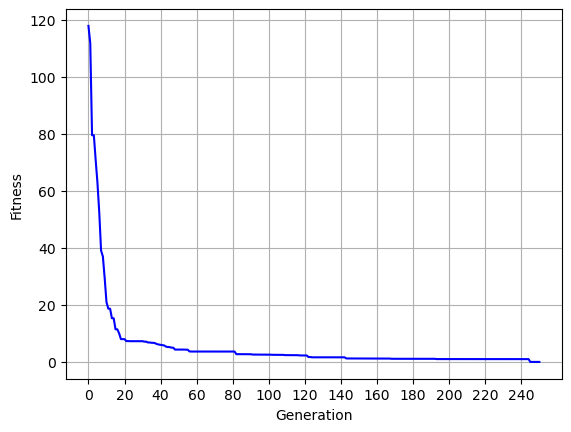

In [6]:
# Plot best solutions
minFit = log.select("Min")

plt.plot(minFit, color='blue')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.grid(True)
plt.xticks(range(0, config.N_GER+1, 20))
plt.show()

In [13]:

# ====== SALVAR RESULTADOS ======
os.makedirs("results", exist_ok=True)

# Obtém data e hora atuais
data_hora = datetime.now().strftime("%d/%m/%Y %H:%M:%S")

# Salva resultados num arquivo .txt
with open("results/resultados.txt", "w") as f:
    f.write("\n" + "="*60 + "\n")
    f.write(f"Data e hora da execução: {data_hora}\n")
    f.write(f"Algoritmo: {algorithm_name}\n")
    f.write(f"Melhor Indivíduo e seu Fitness de {config.TRIALS} rodadas\n")
    f.write(f"Melhor run: {best_run}\n")
    f.write(f"Melhor indivíduo: {best_overall}\n")
    f.write(f"Melhor fitness: {best_fitness}\n")
    
    # Imprime a média dos Fitness dos N Trials
    f.write("\n" + "="*60 + "\n")
    f.write(f"Média do fitness de {config.TRIALS} rodadas\n")
    f.write(f'Média: {media_fitness}')

# Salva o gráfico gerado
plt.figure()
plt.plot(minFit, color='blue')
plt.xlabel('Geração')
plt.ylabel('Menor Fitness')
plt.xticks(range(0, config.N_GER+1, 5))
plt.grid(True)
plt.title(f'Convergência - {algorithm_name}', fontsize=12)
plt.suptitle(f"Data e hora: {data_hora}", fontsize=9)
plt.savefig(f"results/grafico_convergencia_{algorithm_name.replace(' ', '_').replace('(', '').replace(')','')}.png")
plt.close()